In [106]:
# Importamos las librerias necesarias para ejecutar nuestro código
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore") # Instruccción para los avosos de alert

In [107]:
# Cargamos los datos y pedimos que nos muestre los primeros datos
data = pd.read_csv('drugs.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [108]:
# Convertimos las variables categóricas a numéricas como lo piden las instrucciones y solo dejamos el medicamento en categorico
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['BP'] = le_bp.fit_transform(data['BP'])
data['Cholesterol'] = le_chol.fit_transform(data['Cholesterol'])
# Pedimos nos muetre como quedan los datos
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [109]:
# Definimos nuestras variables
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = data[feature_cols]
y = data['Drug']
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [110]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [111]:
# Dividimos nuestros datos  en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: Con criterio de Gini a una profundidad 3
## (dt_gini_3)

In [112]:
 # Crear objeto de clasificación del árbol de decisión con los criterios
dt_gini_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) #aqui en en donde definimos la profundidad3
# Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
dt_gini_3.fit(X_train, y_train)
# Predicción de la respuesta para el grupo de prueba
y_pred = dt_gini_3.predict(X_test)

In [113]:
# Sacamos la Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]])

In [114]:
 # Sacamos las Estadísticas de desempeño
print("Reporte para Gini, profundidad 3:")
print(classification_report(y_test, y_pred))

Reporte para Gini, profundidad 3:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



### Explicación de los estadisticos de desempeño para el Modelo 1 del árbol de decisión 
### usando el modelo gini con produndidad 3
Podemos observar que el modelo tiene una **precisión general del 90%**, lo que indica que predice correctamente el 90% de los casos, este tiene un **promedio de las métricas sin ponderar** es relativamente bueno, pero la baja precisión para drugC afecta el promedio y **el promedio ponderado** es similar a la precisión general, lo que indica que el modelo funciona bien en general, considerando el número de casos en cada clase.
#### Predicciones para los medicamentos
Para el **medicamento A** la precisión, recall y F1-score de 1.00, lo que indica que el modelo predice perfectamente esta droga; para el **medicamento B** tenemos algo similar al medicamento A, púes el modelo también predice perfectamente este medicamento; con el **medicamento C** la precisión, recall y F1-score de 0.00. esto es malisimo, porque el modelo no predice correctamente esta droga en ningún caso; para el **medicamento X** la precisión de 0.75, recall de 1.00 y F1-score de 0.86. lo que nos indica que el modelo predice correctamente todos los casos de este medicamento, pero también predice incorrectamente algunos casos como; y por último el **medicamento Y** vemos una precisión, recall y F1-score de 1.00 lo que nos indica que el modelo predice perfectamente esta droga.

In [115]:
# Instalación de Bibliotecas necesarias para graficar el árbol de decisión
!pip install graphviz
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [116]:
from sklearn import tree
import graphviz 
import pydotplus
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [117]:
# Creación de información para el árbol (reglas de decisión)
dot_data = tree.export_graphviz(dt_gini_3, out_file=None, feature_names = feature_cols, class_names = ['drugA' , 'drugB', 'drugB', 'drugX', 'drugY'])
# Creación de la gráfica del árbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [118]:
# Creación del árbol en formato PDF
graph.write_pdf("Medicamento_gini_3.pdf")
# Creación del árbol en formato PNG
graph.write_png("Medicamento_gini_3.png")
image = Image.open("Medicamento_gini_3.png")
image.show()

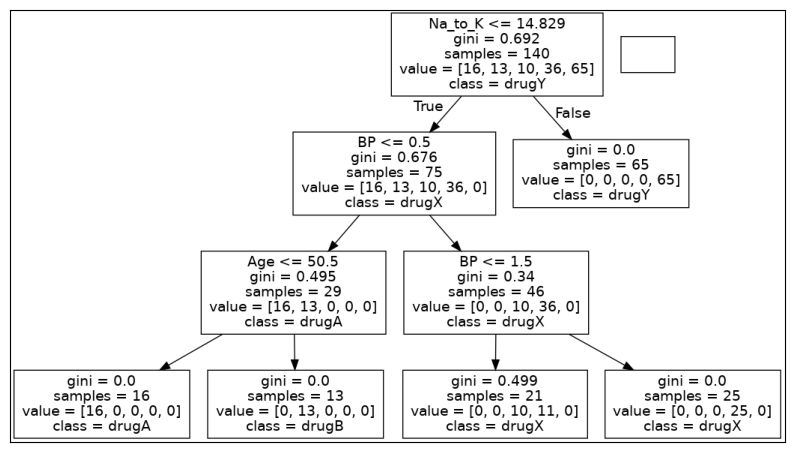

In [119]:
# Mostramos el árbol
ruta_imagen = "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/Medicamento_gini_3.png"
imagen_array = mpimg.imread(ruta_imagen)
# Ajusta el tamaño de la figura aquí (ancho, alto) en pulgadas
plt.figure(figsize=(10, 6)) 
plt.imshow(imagen_array) 
# Quita los números de los ejes X e Y
plt.xticks([])
plt.yticks([])
plt.show()

### Explicación
Gráficamente podemos obserbar que la decisión de que medicamento a suministrar  va a depender de las caracteristicas del pacientge, aqui lo explicamos a detalle, aunque en los siguientes árboles lo haremos de manera general, para este caso lo mpas importante es la relación Sodio-Potasio, si esta es menor o igual a 14.829, el árbol sigue la rama "True" (izquierda). Si no, sigue la rama "False" (derecha); si fue verdad esta condición, entonces nos vamos a la Presión Arterial y si es menor o igual a 0.5, el árbol sigue la rama izquierda. Si no, sigue la rama derecha; Si la Edad es menor o igual a 50.5, el árbol predice drugA; Si la Presión Arterial es menor o igual a 1.5, el árbol predice drugX; Por otro lado si la relación Sodio-Potasio es mayor a 14.829, el árbol predice directamente drugY (todos los pacientes en este nodo pertenecen a esta clase es por eso que ahi termina la ramificación).
Resumiendo podemos observar que el árbol prioriza la relación Sodio-Potasio como la característica más importante, tambien observamos que el árbol predice con alta certeza drugY cuando la relación Sodio-Potasio es alta y por último vemos que el árbol también predice con certeza drugA y drugB bajo ciertas condiciones de Edad y Presión Arterial

## Modelo 2: Con criterio de Gini a una profundidad 5
## (dt_gini_5)

In [120]:
# Crear objeto de clasificación del árbol de decisión con los criterios
dt_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
dt_gini_5.fit(X_train, y_train)
# Predicción de la respuesta para el grupo de prueba
y_pred = dt_gini_5.predict(X_test)

In [121]:
# Sacamos la Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]])

In [122]:
 # Sacamos las Estadísticas de desempeño
print("Reporte para Gini, profundidad 5:")
print(classification_report(y_test, y_pred))

Reporte para Gini, profundidad 5:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Explicación de los estadisticos de desempeño para el Modelo 2 del árbol de decisión
### usando el modelo gini con produndidad 5
Es un excelente modelo, porque la proporción de predicciones es correctas para cada medicamento, y la proporción de casos reales de cada droga que fueron predichos correctamente. Todas estas métricas son 1.00, lo que nos indica un rendimiento perfecto del modelo. 
#### Predicciones para los medicamentos
El modelo predice correctamente el 100% de los casos de suministro de medicamento

In [123]:
# Creación de información para el árbol (reglas de decisión)
dot_data = tree.export_graphviz(dt_gini_5, out_file=None, feature_names = feature_cols, class_names = ['drugA' , 'drugB', 'drugB', 'drugX', 'drugY'])
# Creación de la gráfica del árbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [124]:
# Creación del árbol en formato PDF
graph.write_pdf("Medicamento_gini_5.pdf")
# Creación del árbol en formato PNG
graph.write_png("Medicamento_gini_5.png")
image = Image.open("Medicamento_gini_5.png")
image.show()

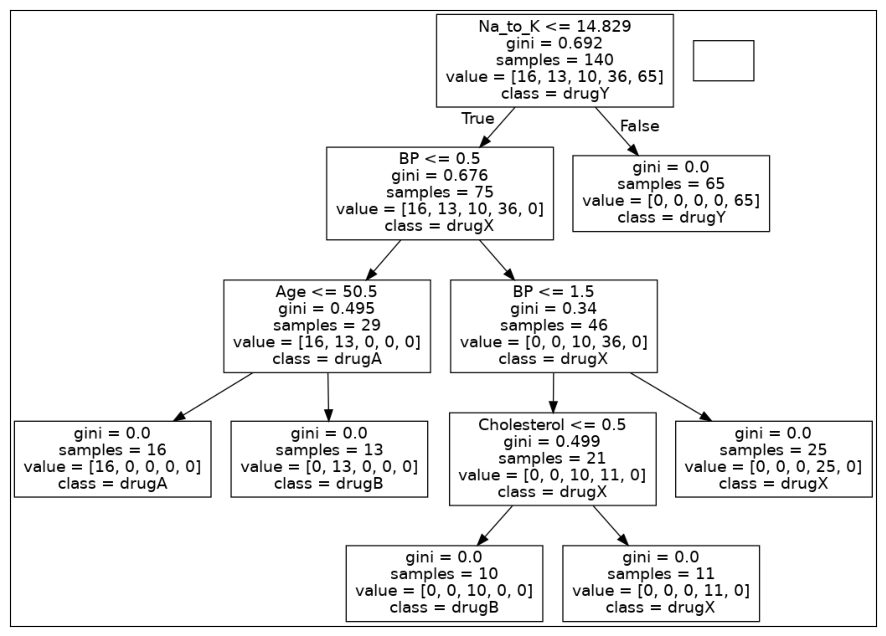

In [125]:
# Mostramos el árbol
ruta_imagen = "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/Medicamento_gini_5.png"
imagen_array = mpimg.imread(ruta_imagen)
# Ajusta el tamaño de la figura aquí (ancho, alto) en pulgadas
plt.figure(figsize=(12, 8)) 
plt.imshow(imagen_array) 
# Quita los números de los ejes X e Y
plt.xticks([])
plt.yticks([])
plt.show()

### Explicación
Podemos observar que todos los nodos hoja tienen Gini = 0.0, esto nos indica que son completamente puros, y que predice con una confiabilidad del 100% un medicamento específico (drugA, drugB, drugX, drugY)
Este árbol prioriza la relación Sodio-Potasio como la característica más importante
Gráficamente vemos los caminos que debemos seguir dependiendo de las caracteristicas del paciente, por ejemplo si el paciente tiene una relación Sodio-Potasio es menor o igual a 14.829, el árbol sigue la rama "True" (izquierda), después si la Presión Arterial es mayor a 0.5, el árbol sigue la rama derecha (Falso de la condición BP <= 0.5) y si de ahi la Presión Arterial es menor o igual a 1.5, el árbol predice que tenemos que suministrar la drugX.

## Modelo 3: Con criterio de Entropía, profundidad 3
### (dt_entropy_3)

In [126]:
 # Crear objeto de clasificación del árbol de decisión con los criterios
dt_entropy_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) #aqui en en donde definimos la profundidad3
# Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
dt_entropy_3.fit(X_train, y_train)
# Predicción de la respuesta para el grupo de prueba
y_pred = dt_entropy_3.predict(X_test)

In [127]:
# Sacamos la Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]])

In [128]:
 # Sacamos las Estadísticas de desempeño
print("Reporte para Entropy, profundidad 3:")
print(classification_report(y_test, y_pred))

Reporte para Entropy, profundidad 3:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



### Explicación de los estadisticos de desempeño para el Modelo 3 del árbol de decisión
### usando el modelo de entropia con produndidad 3
Los indicadores nos muestran que el modelo tiene una precisión general del 90%, lo que indica que predice correctamente el 90% de los casos, el promedio de las métricas sin ponderar es relativamente bueno, pero la baja precisión para drugC lo que afecta el promedio, tambien podemos afirmar que el promedio ponderado es similar a la precisión general, lo que indica que el modelo funciona bien en general, considerando el número de casos en cada clase

#### Predicciones para los medicamentos
La precisión, recall y F1-score de 1.00, en el caso del medicamento A, B, Y lo que indica que el modelo predice perfectamente este medicamento; pero en el caso de la drugX la precisión de 0.75, recall de 1.00 y F1-score de 0.86, esto nos indica que el modelo predice incorrectamente algunos casos con este medicamento y por ultimo podemos observarel peor escenario con la drugC, porque no predice correctamente esta droga en ningún caso.

In [129]:
# Creación de información para el árbol (reglas de decisión)
dot_data = tree.export_graphviz(dt_entropy_3, out_file=None, feature_names = feature_cols, class_names = ['drugA' , 'drugB', 'drugB', 'drugX', 'drugY'])
# Creación de la gráfica del árbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [130]:
# Creación del árbol en formato PDF
graph.write_pdf("Medicamento_entropy_3.pdf")
# Creación del árbol en formato PNG
graph.write_png("Medicamento_entropy_3.png")
image = Image.open("Medicamento_entropy_3.png")
image.show()

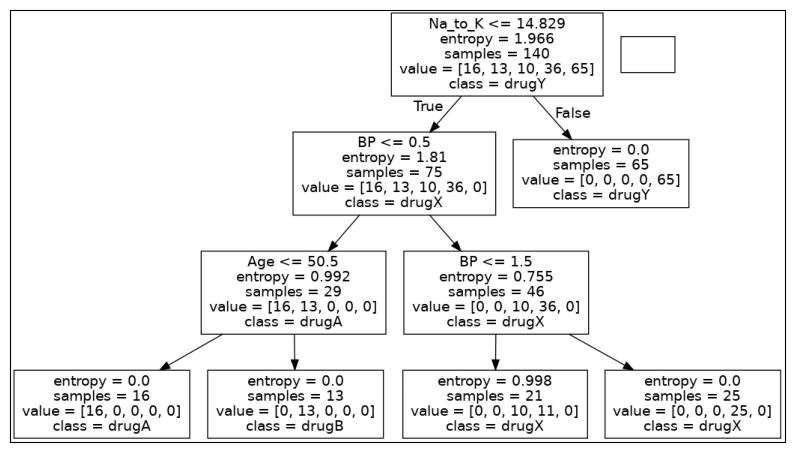

In [131]:
# Mostramos el árbol
ruta_imagen = "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/Medicamento_entropy_3.png"
imagen_array = mpimg.imread(ruta_imagen)
# Ajusta el tamaño de la figura aquí (ancho, alto) en pulgadas
plt.figure(figsize=(10, 6)) 
plt.imshow(imagen_array) 
# Quita los números de los ejes X e Y
plt.xticks([])
plt.yticks([])
plt.show()

### Explicación
El árbol de decisión, prioriza la relación Sodio-Potasio como la característica más importante, el árbol predice con alta certeza drugY cuando la relación Sodio-Potasio es alta, por ultimo podemos decir que el árbol también predice con certeza drugA y drugB bajo ciertas condiciones de Edad y Presión Arterial. Gráficamente vemos los caminos que debemos seguir dependiendo de las caracteristicas del paciente, por ejemplo si se cumple la condición **Na_to_K <= 14.829**, pasamos a la condición **BP <= 0.5**, si esta condición tambien se cumple evaluamos que el paciente cumpla con la siguiente condición de edad **Age <= 50.5**, y si esta se cumple podemos con seguridad suministrar **el medicamento A**, ya que como nos indica el parametro 0.0, este no tiene algun rango de error.

## Modelo 4: Con criterio de Entropía, profundidad 5
### (dt_entropy_5)

In [132]:
# Crear objeto de clasificación del árbol de decisión con los criterios
dt_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42) #aqui en en donde definimos la profundidad3
# Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
dt_entropy_5.fit(X_train, y_train)
# Predicción de la respuesta para el grupo de prueba
y_pred = dt_entropy_5.predict(X_test)

In [133]:
# Sacamos la Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]])

In [134]:
 # Sacamos las Estadísticas de desempeño
print("Reporte para Entropy, profundidad 5:")
print(classification_report(y_test, y_pred))

Reporte para Entropy, profundidad 5:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Explicación de los estadisticos de desempeño para el Modelo 4 del árbol de decisión
### usando el modelo de entropia con produndidad 5
Todas estas métricas son 1.00, lo que indica un rendimiento perfecto del modelo. Esto significa que el modelo predice correctamente el 100% de los casos.

#### Predicciones para los medicamentos
Y como es de obviar, las predicciones para el suministro de medicamentos serán correctas, siempre y cuando se sigan los criterios que el modelo nos marca

In [135]:
# Creación de información para el árbol (reglas de decisión)
dot_data = tree.export_graphviz(dt_entropy_5, out_file=None, feature_names = feature_cols, class_names = ['drugA' , 'drugB', 'drugB', 'drugX', 'drugY'])
# Creación de la gráfica del árbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [136]:
# Creación del árbol en formato PDF
graph.write_pdf("Medicamento_entropy_5.pdf")
# Creación del árbol en formato PNG
graph.write_png("Medicamento_entropy_5.png")
image = Image.open("Medicamento_entropy_5.png")
image.show()

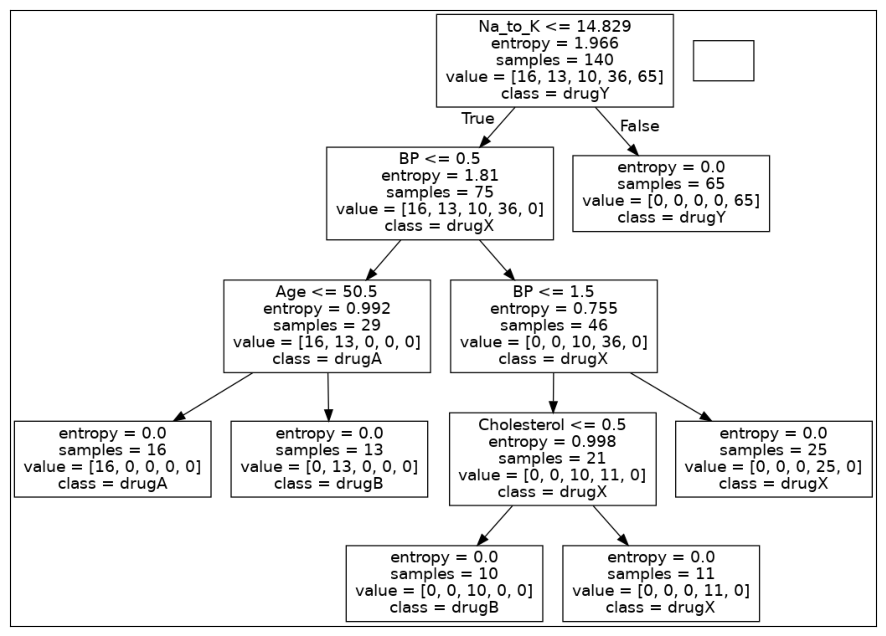

In [137]:
# Mostramos el árbol
ruta_imagen = "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/Medicamento_entropy_5.png"
imagen_array = mpimg.imread(ruta_imagen)
# Ajusta el tamaño de la figura aquí (ancho, alto) en pulgadas
plt.figure(figsize=(12, 8)) 
plt.imshow(imagen_array) 
# Quita los números de los ejes X e Y
plt.xticks([])
plt.yticks([])
plt.show()

### Explicación
Al igual que em el modelo 2, es este podemos observar que todos los nodos hoja tienen **Gini=0.0**, esto nos indica que son completamente puros, y que predice con una confiabilidad del 100% un medicamento específico (drugA, drugB, drugX, drugY)
Gráficamente vemos los caminos que debemos seguir dependiendo de las caracteristicas del paciente, por ejemplo si se cumple la condición **Na_to_K <= 14.829** seguimos con la condición **BP<=0.5** y si esta se cumple nos vamos a la condición de la edad **Age<=50.5**, de cumplirse esta condición podemos tomar la decisión de suministrar con el 100% de confianza el **medicamento A**

### Mejor modelo
Como resultado con base a los modelos desarrollados, podemos concluir que el modelo 2 y 4 (Evaluación con los criterios Gini y Entropía, ambos con 5 niveles de evaluación) son optimos y confiables al 100%, por lo que es indiferente usar cualquiera de los 2 para la predicción del paciente que se nos plantea en la practica. Entonces, usaremos el ultimo modelo desarrollado

In [138]:
# Preparamos los datos del nuevo paciente 
new_p = pd.DataFrame({
    'Age': [50],
    'Sex': le_sex.transform(['F']),
    'BP': le_bp.transform(['HIGH']),
    'Cholesterol': le_chol.transform(['NORMAL']),
    'Na_to_K': [15.302]
})

# Predecimos en código con el mejor modelo (asumiendo dt_entropy_5)
predicted_drug = dt_entropy_5.predict(new_p)
print(f"Medicamento recomendado: {predicted_drug[0]}")

Medicamento recomendado: drugY


Visualmente, desde que vemos que la condición **Na_to_K': [15.302]** podemos concluir que el **medicamento Y** será el que se recete, ya que 15.302 no cumple con la condición **Na_to_K <= 14.829** y esta de inmediato nos dice que medicamento se debe suministrar en caso de no cumplir esta condición